## Models for C250

In [ ]:
!pip install PyMechkar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# List of all the names file
files = ["S1-ADL1_sensors_data.txt", "S1-ADL2_sensors_data.txt", "S1-ADL3_sensors_data.txt", "S1-ADL4_sensors_data.txt", "S1-ADL5_sensors_data.txt", "S2-ADL1_sensors_data.txt", "S2-ADL2_sensors_data.txt", "S2-ADL3_sensors_data.txt", "S2-ADL4_sensors_data.txt", "S2-ADL5_sensors_data.txt", "S3-ADL1_sensors_data.txt", "S3-ADL2_sensors_data.txt", "S3-ADL3_sensors_data.txt", "S3-ADL4_sensors_data.txt", "S3-ADL5_sensors_data.txt", "S4-ADL1_sensors_data.txt", "S4-ADL2_sensors_data.txt", "S4-ADL3_sensors_data.txt", "S4-ADL4_sensors_data.txt", "S4-ADL5_sensors_data.txt"]

In [ ]:
# Remove the Test dataset from the file's list
files.remove("S1-ADL2_sensors_data.txt")
files.remove("S2-ADL4_sensors_data.txt")
files.remove("S3-ADL1_sensors_data.txt")
files.remove("S3-ADL5_sensors_data.txt")
files.remove("S4-ADL3_sensors_data.txt")

In [ ]:
df = pd.DataFrame()

In [ ]:
PATH = "/content/drive/MyDrive/קבצים/"
# Read all the Train dataset and concat them to one dataframe - df
for f in files:
  file_path = PATH + f
  df1 = pd.read_csv(file_path,sep=" ",header=None)
  df = pd.concat([df, df1], ignore_index=True)

In [ ]:
# loc the relevant columns to the X
X = df.loc[:,0:242]
X.shape

(491131, 243)

In [ ]:
# loc the relevant columns to the Y
Y = df.loc[:,243:]
Y.shape

(491131, 7)

In [ ]:
# change the NA to 0
X = X.fillna(0)

In [ ]:
# PCA for the df
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

### Final Test - Preprocessing


In [ ]:
PATH = "/content/drive/MyDrive/קבצים/"
# Read all the Test dataset and concat them to one dataframe - dfFinalTest
finalTest = ["S1-ADL2_sensors_data.txt", "S2-ADL4_sensors_data.txt", "S3-ADL1_sensors_data.txt", "S3-ADL5_sensors_data.txt", "S4-ADL3_sensors_data.txt"]
dfFinalTest = pd.DataFrame()
for f in finalTest:
  file_pathTest = PATH + f
  dfTest = pd.read_csv(file_pathTest,sep=" ",header=None)
  dfFinalTest = pd.concat([dfFinalTest, dfTest], ignore_index=True)

In [ ]:
# loc the relevant columns to the X,Y
XFinalTest = dfFinalTest.loc[:,0:242]
YFinalTest = dfFinalTest.loc[:,243:]

In [ ]:
# change the NA to 0
XFinalTest = XFinalTest.fillna(0)

In [ ]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y[249])
print("train: ",X_train.shape,y_train.shape)
print("test: ",X_test.shape,y_test.shape)

train:  (368348, 243) (368348,)
test:  (122783, 243) (122783,)


## Logistic Regression




In [ ]:
# Train the model
mod1 = LogisticRegression(random_state=1, max_iter=1000)
mod1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1)

In [ ]:
# Make a predict and save them to yhat
yhat_train = mod1.predict(X_train)
yhat_test = mod1.predict(X_test)

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8658442559753277
Test Accuracy: 0.8652989420359496


In [ ]:
# Calculate the accuracy score of the finalTest
yhat_FinalTest = mod1.predict(XFinalTest)
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print(FinalTest_accuracy)

0.8288021219331435


## Decision Tree

In [ ]:
# Train the model
mod2 = DecisionTreeClassifier(random_state=1)
mod2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Make a predict and save them to yhat
yhat_train = mod2.predict(X_train)
yhat_test = mod2.predict(X_test)

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9783601964441332


In [ ]:
# Calculate the accuracy score of the finalTest
yhat_FinalTest = mod2.predict(XFinalTest)
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print(FinalTest_accuracy)

0.770195420681047


## Random Forest

In [ ]:
# Train the model
mod3 = RandomForestClassifier(random_state=3)
mod3.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [ ]:
# Make a predict and save them to yhat
yhat_train = mod3.predict(X_train)
yhat_test = mod3.predict(X_test)

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9953658079701587


In [ ]:
# Calculate the accuracy score of the finalTest
yhat_FinalTest = mod3.predict(XFinalTest)
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print(FinalTest_accuracy)

0.8691474561506156


## Adaptive Boosting (ADABoost)

In [ ]:
# Train the model
mod4 = AdaBoostClassifier(random_state=1)
mod4.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
# Make a predict and save them to yhat
yhat_train = mod4.predict(X_train)
yhat_test = mod4.predict(X_test)

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7790214688283905
Test Accuracy: 0.7780637384654228


In [ ]:
# Calculate the accuracy score of the finalTest
yhat_FinalTest = mod4.predict(XFinalTest)
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print(FinalTest_accuracy)

0.7499122362210867


## Gradient Boosting Machine (GBM)

In [ ]:
# Train the model
mod5 = GradientBoostingClassifier(random_state=1, learning_rate=0.1, max_depth=2)
mod5.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=2, random_state=1)

In [ ]:
# Make a predict and save them to yhat
yhat_train = mod5.predict(X_train)
yhat_test = mod5.predict(X_test)

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9359573012477331
Test Accuracy: 0.9320997206453662


In [ ]:
# Calculate the accuracy score of the finalTest
yhat_FinalTest = mod5.predict(XFinalTest)
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print(FinalTest_accuracy)

0.855683842363251


## Stochastic Gradient Descent (SGDClassifier)

In [ ]:
# scaling before training to improve the convergence rate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
XFinalTest_scaled = scaler.transform(XFinalTest)

In [ ]:
# Train the model
mod6 = SGDClassifier(loss='hinge', alpha=0.001, max_iter=1000)
mod6.fit(X_train_scaled,y_train)

SGDClassifier(alpha=0.001)

In [ ]:
# Make a predict and save them to yhat
yhat_train = mod6.predict(X_train_scaled)
yhat_test = mod6.predict(X_test_scaled)

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8698513362363851
Test Accuracy: 0.8689313667201486


In [ ]:
# Calculate the accuracy score of the finalTest
yhat_FinalTest = mod6.predict(XFinalTest_scaled)
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print(FinalTest_accuracy)

0.8401399019646084


## eXtreme Gradient Boosting (XGBClassifier)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Train the model
mod7 = XGBClassifier()
mod7.fit(X_train_scaled, y_train_encoded)

In [ ]:
# Make predictions and save them
yhat_train_encoded = mod7.predict(X_train_scaled)
yhat_test_encoded = mod7.predict(X_test_scaled)

# Decode the predicted labels
yhat_train = label_encoder.inverse_transform(yhat_train_encoded)
yhat_test = label_encoder.inverse_transform(yhat_test_encoded)

In [ ]:
#@title
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

In [ ]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999809962318242
Test Accuracy: 0.9962779863661908


In [ ]:
# Encode and predict on the final test set
yFinalTest_encoded = label_encoder.transform(YFinalTest[249])
yhat_FinalTest_encoded = mod7.predict(XFinalTest_scaled)

# Decode the predicted labels for final test set
yhat_FinalTest = label_encoder.inverse_transform(yhat_FinalTest_encoded)

# Calculate the accuracy score of the final test set
FinalTest_accuracy = accuracy_score(YFinalTest[249], yhat_FinalTest)
print("Final Test Accuracy:", FinalTest_accuracy)

In [ ]:
print("Final Test Accuracy:", FinalTest_accuracy)

Final Test Accuracy: 0.8916669917176997


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, yhat_test)
cm

array([[102968,      1,      6,      3,      5,      1,      2,     14,
             6,      3,      6,      3,      0,      4,      7,     12,
             6,      8],
       [    21,    828,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     3,      0,    695,      0,      0,      0,      0,      0,
             0,      0,      1,      0,      0,      0,      0,      0,
             1,      0],
       [    10,      0,      0,    414,      0,      0,      0,      0,
             0,      0,      0,      3,      0,      0,      0,      0,
             0,      0],
       [    23,      0,      0,      0,    837,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [    22,      0,      0,      0,      0,   1011,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
           

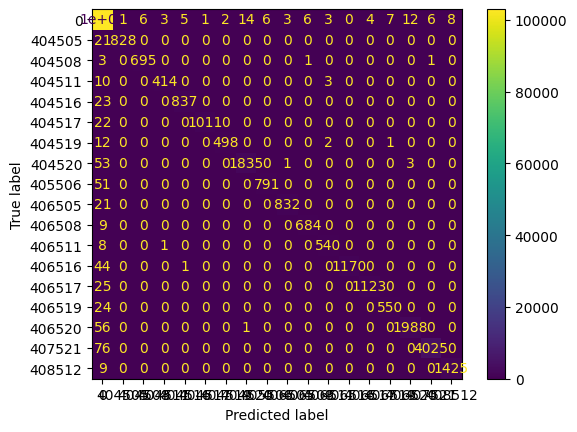

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','404505','404508','404511','404516','404517', '404519', '404520', '405506', '406505', '406508', '406511', '406516', '406517', '406519', '406520', '407521', '408512']).plot();

In [ ]:
feature_importance = mod7.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 50))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')